# Planning a Trip Across Mumbai using Unsupervised Learning: Geo-Location Clustering

## Preparing the dataset

In [36]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as Soup
from sklearn.neighbors import NearestCentroid

In [37]:
map_kml = "Travel.kml"
with open('Travel.kml') as data:
    kml_soup = Soup(data, 'lxml-xml')
coord = kml_soup.find_all('coordinates')
coord_list=[]
for x in coord:
    coord_list.append(str(x))
#coord_list

name = kml_soup.find_all('name')
name_list = []
for x in name:
    name_list.append(str(x))

In [38]:
cor_col = ['Longitude', 'Latitude', 'Landmark']
df_col = pd.DataFrame(columns = cor_col)
for i, j in zip(range(len(coord_list)), range(2, len(name_list))):
    itm = coord_list[i]
    string_split = itm.split(',')
    #print(string_split[0][24:])
    cor1 = float(string_split[0][24:])
    cor2 = float(string_split[1])
    cor3 = name_list[j][6:-7]
    df_col.loc[i] = [cor1, cor2, cor3]

In [39]:
df_col

,Longitude,Latitude,Landmark
0,72.860127,19.000668,Sewri Mangrove Park
1,72.861633,18.995574,Lalbaugcha Raja
2,72.835874,18.990991,Nehru Science Centre
3,72.818873,18.990791,Nehru Planetarium
4,72.814797,18.990059,Haji Ali Dargah
5,72.808915,18.982728,Shree Mahalakshmi Temple
6,72.806366,18.977327,Malabar Point
7,72.793990,18.941096,Tower of Silence
8,72.807148,18.961818,Mumbai Chowpatty Beach
9,72.813882,18.954749,"Nariman Point, Mumbai, Maharashtra"


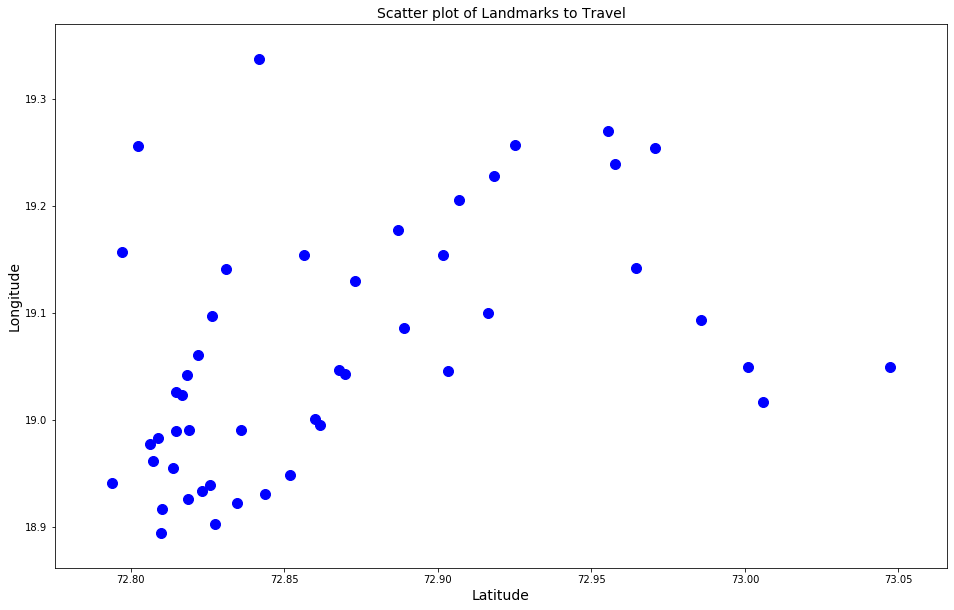

In [40]:
fig = plt.figure(figsize=(16,10))
plt.scatter(df_col['Longitude'], df_col['Latitude'], c = 'blue', s = 100)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('Scatter plot of Landmarks to Travel', fontsize=14)
plt.show()

In [41]:
X = df_col[['Longitude','Latitude']].values


## Mini Batch K-Means Clustering: Eucliedian Distance

In [42]:
from sklearn.cluster import MiniBatchKMeans
km = MiniBatchKMeans(n_clusters=14, random_state=1 )
Km_pred = km.fit_predict(X)

In [43]:
Km_pred

array([ 4,  4,  4,  7,  7,  7,  7,  7,  7,  7,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  9,  9,  9,  9, 10, 10, 10, 10,  0,  0,  0, 11,  5, 10,  3,
       11, 11,  5,  5,  6, 13,  3,  2,  2,  2, 11, 12, 12,  8])

In [44]:
Km_schedule = pd.concat([df_col.reset_index(), pd.DataFrame({'Cluster':Km_pred})], axis=1)
#days
Km_schedule.drop("index", axis = 1, inplace = True)

In [45]:
cond_list = [
    Km_schedule['Cluster'] == 0,
    Km_schedule['Cluster'] == 1,
    Km_schedule['Cluster'] == 2,
    Km_schedule['Cluster'] == 3,
    Km_schedule['Cluster'] == 4,
    Km_schedule['Cluster'] == 5,
    Km_schedule['Cluster'] == 6,
    Km_schedule['Cluster'] == 7,
    Km_schedule['Cluster'] == 8,
    Km_schedule['Cluster'] == 9,
    Km_schedule['Cluster'] == 10,
    Km_schedule['Cluster'] == 11,
    Km_schedule['Cluster'] == 12,
    Km_schedule['Cluster'] == 13,
]
options = ['Week 1 Sun', 'Week 1 Mon', 'Week 1 Tues', 'Week 1 Wed', 'Week 1 Thurs', 'Week 1 Fri', 'Week 1 Sat', 
           'Week 2 Sun', 'Week 2 Mon', 'Week 2 Tues', 'Week 2 Wed', 'Week 2 Thurs', 'Week 2 Fri', 'Week 2 Sat']
Km_schedule['Schedule'] = np.select(cond_list, options, default = 'black')

In [46]:
Km_schedule.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Schedule
28,72.830906,19.141213,Madh Mangroves,0,Week 1 Sun
27,72.826448,19.097419,Infiniti Mall,0,Week 1 Sun
29,72.797175,19.156824,NNP Waterfall,0,Week 1 Sun
15,72.843845,18.930641,Marine Drive,1,Week 1 Mon
14,72.834654,18.921984,Mumbai Cruise Pirs,1,Week 1 Mon
13,72.827373,18.902382,Gateway Of India Mumbai,1,Week 1 Mon
12,72.809928,18.893997,Oyster Rock,1,Week 1 Mon
11,72.810169,18.916724,Prongs Reef,1,Week 1 Mon
10,72.818597,18.925666,The Mumbai friend tower,1,Week 1 Mon
18,72.851741,18.948104,Worli Fort,1,Week 1 Mon


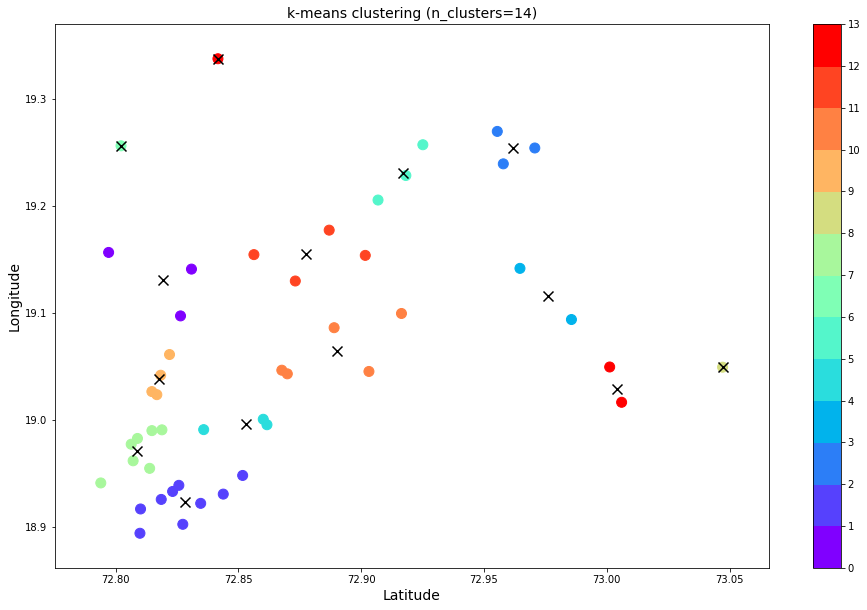

In [47]:
colormap = plt.cm.rainbow
normalize = matplotlib.colors.BoundaryNorm(np.arange(0,14,1), colormap.N)
fig = plt.figure(figsize=(16,10))
plt.scatter(Km_schedule['Longitude'], Km_schedule['Latitude'], c = Km_schedule['Cluster'], cmap = colormap, norm= normalize, s = 100)
plt.colorbar(ticks=np.linspace(0,13,14))
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1, marker = "x");
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('k-means clustering (n_clusters=14)', fontsize=14)
plt.show()

## Agglomerative Clustering: Manhattan Distance

In [48]:
#AgglomerativeClustering (Manhattan Distance)
from sklearn.cluster import AgglomerativeClustering
Aggl_C = AgglomerativeClustering(n_clusters=14, affinity = 'manhattan' , linkage = 'average')
Agg_pred = Aggl_C.fit_predict(X)

In [49]:
AgC_schedule= pd.concat([df_col.reset_index(), pd.DataFrame({'Cluster':Agg_pred})], axis=1)
#days
AgC_schedule.drop("index", axis = 1, inplace = True)

In [50]:
cond_list = [
    AgC_schedule['Cluster'] == 0,
    AgC_schedule['Cluster'] == 1,
    AgC_schedule['Cluster'] == 2,
    AgC_schedule['Cluster'] == 3,
    AgC_schedule['Cluster'] == 4,
    AgC_schedule['Cluster'] == 5,
    AgC_schedule['Cluster'] == 6,
    AgC_schedule['Cluster'] == 7,
    AgC_schedule['Cluster'] == 8,
    AgC_schedule['Cluster'] == 9,
    AgC_schedule['Cluster'] == 10,
    AgC_schedule['Cluster'] == 11,
    AgC_schedule['Cluster'] == 12,
    AgC_schedule['Cluster'] == 13,
]
options = ['Week 1 Sun', 'Week 1 Mon', 'Week 1 Tues', 'Week 1 Wed', 'Week 1 Thurs', 'Week 1 Fri', 'Week 1 Sat', 
           'Week 2 Sun', 'Week 2 Mon', 'Week 2 Tues', 'Week 2 Wed', 'Week 2 Thurs', 'Week 2 Fri', 'Week 2 Sat']
AgC_schedule['Schedule'] = np.select(cond_list, options, default = 'black')

In [51]:
AgC_schedule.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Schedule
27,72.826448,19.097419,Infiniti Mall,0,Week 1 Sun
22,72.821968,19.061267,Sion Fort,0,Week 1 Sun
21,72.818359,19.041889,Bandra Sea View,0,Week 1 Sun
20,72.814780,19.026613,Bandra Fort,0,Week 1 Sun
19,72.816800,19.023712,Bandra Worli Sea Link,0,Week 1 Sun
0,72.860127,19.000668,Sewri Mangrove Park,1,Week 1 Mon
25,72.869919,19.043203,"Phoenix Marketcity, Mumbai",1,Week 1 Mon
24,72.903145,19.045433,Siddhivinayak Temple,1,Week 1 Mon
23,72.867682,19.046592,Cubic Mall,1,Week 1 Mon
1,72.861633,18.995574,Lalbaugcha Raja,1,Week 1 Mon


In [52]:
clf = NearestCentroid(metric = 'manhattan')
clf.fit(X, Agg_pred)

NearestCentroid(metric='manhattan', shrink_threshold=None)

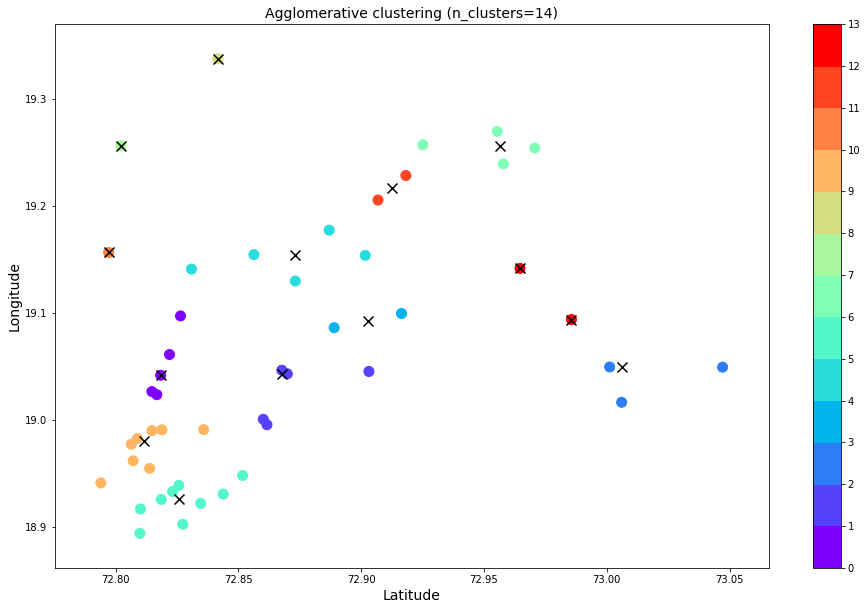

In [53]:
colormap = plt.cm.rainbow
normalize = matplotlib.colors.BoundaryNorm(np.arange(0,14,1), colormap.N)
fig = plt.figure(figsize=(16,10))
plt.scatter(AgC_schedule['Longitude'], AgC_schedule['Latitude'], c = AgC_schedule['Cluster'], cmap = colormap, norm= normalize, s = 100)
plt.colorbar(ticks=np.linspace(0,13,14))
centers = clf.centroids_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1 ,marker = 'x');
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('Agglomerative clustering (n_clusters=14)', fontsize=14)
plt.show()

## Hierarchical Density-Based Spatial Clustering (HDBSCAN): Haversine Distance

In [60]:
import hdbscan as hdb

In [61]:
radians = np.radians(X)
Hdbs_Clus = hdb.HDBSCAN(min_cluster_size=2, metric='haversine')
Hdbs_pred = Hdbs_Clus.fit_predict(X)

In [62]:
Hdbs_pred

array([ 9,  9, -1, 13, 13, 14, 14, -1, 10, 10, 11, 11, -1, -1, 12, 12, 11,
       11, -1,  6,  6,  6,  6,  3,  3,  3,  4, -1,  2, -1,  7,  8,  4,  1,
        2,  2,  8,  8,  0,  0,  1,  5,  5,  5,  7,  1,  1,  1],
      dtype=int64)

In [63]:
Hdbs_schedule= pd.concat([df_col.reset_index(), pd.DataFrame({'Cluster':Hdbs_pred})], axis=1)
#days
Hdbs_schedule.drop("index", axis = 1, inplace = True)

In [64]:
cond_list = [
    Hdbs_schedule['Cluster'] == -1,
    Hdbs_schedule['Cluster'] == 0,
    Hdbs_schedule['Cluster'] == 1,
    Hdbs_schedule['Cluster'] == 2,
    Hdbs_schedule['Cluster'] == 3,
    Hdbs_schedule['Cluster'] == 4,
    Hdbs_schedule['Cluster'] == 5,
    Hdbs_schedule['Cluster'] == 6,
    Hdbs_schedule['Cluster'] == 7,
    Hdbs_schedule['Cluster'] == 8,
    Hdbs_schedule['Cluster'] == 9,
    Hdbs_schedule['Cluster'] == 10,
    Hdbs_schedule['Cluster'] == 11,
    Hdbs_schedule['Cluster'] == 12,
    Hdbs_schedule['Cluster'] == 13,
    Hdbs_schedule['Cluster'] == 14,
]
options = ['Noise', 'Week 1 Sun', 'Week 1 Mon', 'Week 1 Tues', 'Week 1 Wed', 'Week 1 Thurs', 'Week 1 Fri', 'Week 1 Sat', 
           'Week 2 Sun', 'Week 2 Mon', 'Week 2 Tues', 'Week 2 Wed', 'Week 2 Thurs', 'Week 2 Fri', 'Week 2 Sat', 'Week 3 Sun']
Hdbs_schedule['Schedule'] = np.select(cond_list, options, default = 'black')

In [65]:
Hdbs_schedule.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Schedule
18,72.851741,18.948104,Worli Fort,-1,Noise
27,72.826448,19.097419,Infiniti Mall,-1,Noise
2,72.835874,18.990991,Nehru Science Centre,-1,Noise
13,72.827373,18.902382,Gateway Of India Mumbai,-1,Noise
12,72.809928,18.893997,Oyster Rock,-1,Noise
7,72.793990,18.941096,Tower of Silence,-1,Noise
29,72.797175,19.156824,NNP Waterfall,-1,Noise
39,72.841675,19.338089,"Bird Watching Area, Bhandup West",0,Week 1 Sun
38,72.802213,19.256596,Panju island beach,0,Week 1 Sun
47,73.047118,19.049426,Parsik Mountain Range,1,Week 1 Mon


In [70]:
clf = NearestCentroid()
clf.fit(X, Agg_pred)

NearestCentroid(metric='euclidean', shrink_threshold=None)

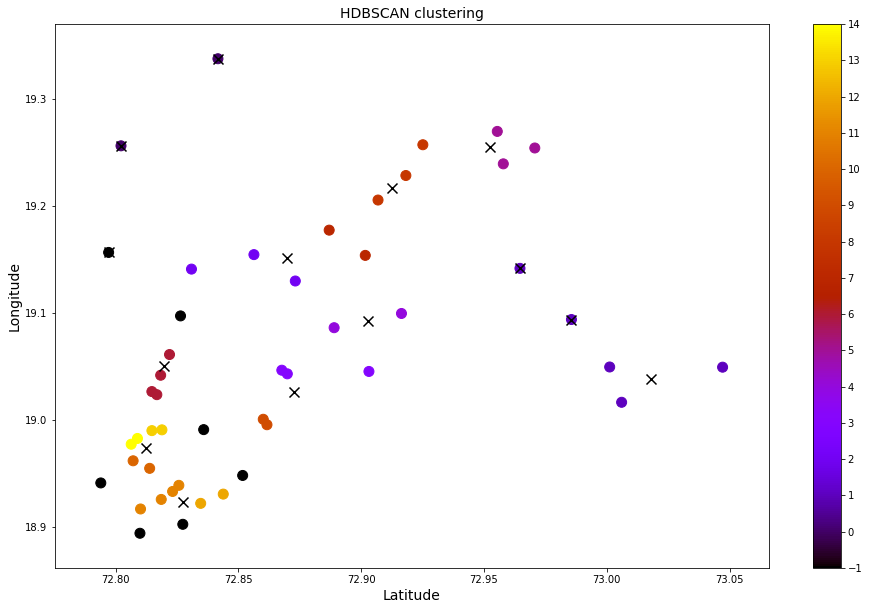

In [71]:
colormap = plt.cm.gnuplot
#normalize = matplotlib.colors.BoundaryNorm(np.arange(0,14,1), colormap.N)
fig = plt.figure(figsize=(16,10))
plt.scatter(Hdbs_schedule['Longitude'], Hdbs_schedule['Latitude'], c = Hdbs_schedule['Cluster'], cmap = colormap, s = 100)
plt.colorbar(ticks=np.linspace(-1,14,16))
centers = clf.centroids_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1 ,marker = 'x');
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('HDBSCAN clustering', fontsize=14)
plt.show()

## Ordering Points To Identify the Clustering Structure (OPTICS): Minkowski Distance

In [72]:
from sklearn.cluster import OPTICS
Opt_C = OPTICS(min_samples = 2, metric = 'chebyshev')
Opt_pred = Opt_C.fit_predict(X)

In [73]:
Opt_pred

array([ 0,  0, -1,  1,  1,  2,  2, -1,  3,  3,  4,  4, -1, -1,  5,  5,  4,
        4, -1,  6,  6,  6,  6,  7,  7,  7,  8,  6,  9, -1, 10, 11,  8, 13,
        9,  9, 11, -1, -1, -1, -1, 12, 12, 12, 10, 13, 13, 13])

In [74]:
Opt_schedule= pd.concat([df_col.reset_index(), pd.DataFrame({'Cluster':Opt_pred})], axis=1)
#days
Opt_schedule.drop("index", axis = 1, inplace = True)

In [75]:
cond_list = [
    Opt_schedule['Cluster'] == -1,
    Opt_schedule['Cluster'] == 0,
    Opt_schedule['Cluster'] == 1,
    Opt_schedule['Cluster'] == 2,
    Opt_schedule['Cluster'] == 3,
    Opt_schedule['Cluster'] == 4,
    Opt_schedule['Cluster'] == 5,
    Opt_schedule['Cluster'] == 6,
    Opt_schedule['Cluster'] == 7,
    Opt_schedule['Cluster'] == 8,
    Opt_schedule['Cluster'] == 9,
    Opt_schedule['Cluster'] == 10,
    Opt_schedule['Cluster'] == 11,
    Opt_schedule['Cluster'] == 12,
    Opt_schedule['Cluster'] == 13,
    Opt_schedule['Cluster'] == 14,
]
options = ['Noise', 'Week 1 Sun', 'Week 1 Mon', 'Week 1 Tues', 'Week 1 Wed', 'Week 1 Thurs', 'Week 1 Fri', 'Week 1 Sat', 
           'Week 2 Sun', 'Week 2 Mon', 'Week 2 Tues', 'Week 2 Wed', 'Week 2 Thurs', 'Week 2 Fri', 'Week 2 Sat', 'Week 3 Sun']
Opt_schedule['Schedule'] = np.select(cond_list, options, default = 'black')

In [30]:
Opt_schedule.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Schedule
29,72.797175,19.156824,NNP Waterfall,-1,Noise
37,72.925095,19.257601,Jamdar Pada Dam,-1,Noise
2,72.835874,18.990991,Nehru Science Centre,-1,Noise
38,72.802213,19.256596,Panju island beach,-1,Noise
39,72.841675,19.338089,"Bird Watching Area, Bhandup West",-1,Noise
40,72.964628,19.141906,Kokanipada Waterfall,-1,Noise
18,72.851741,18.948104,Worli Fort,-1,Noise
7,72.793990,18.941096,Tower of Silence,-1,Noise
13,72.827373,18.902382,Gateway Of India Mumbai,-1,Noise
12,72.809928,18.893997,Oyster Rock,-1,Noise


In [78]:
clf = NearestCentroid()
clf.fit(X, Agg_pred)

NearestCentroid(metric='euclidean', shrink_threshold=None)

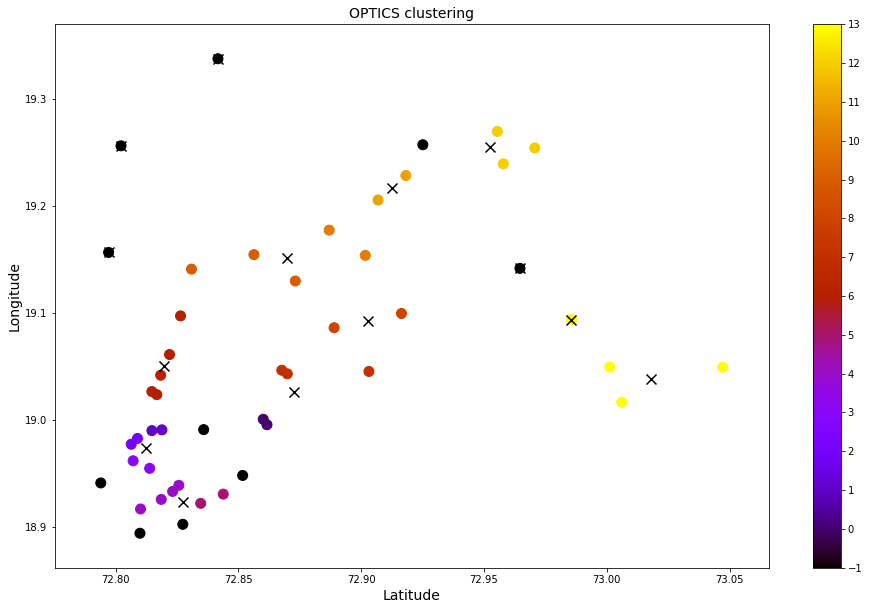

In [82]:
colormap = plt.cm.gnuplot
#normalize = matplotlib.colors.BoundaryNorm(np.arange(0,14,1), colormap.N)
fig = plt.figure(figsize=(16,10))
plt.scatter(Opt_schedule['Longitude'], Opt_schedule['Latitude'], c = Opt_schedule['Cluster'], cmap = colormap, s = 100)
plt.colorbar(ticks=np.linspace(-1,13,15))
centers = clf.centroids_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1 ,marker = 'x');
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('OPTICS clustering', fontsize=14)
plt.show()

## Balanced Iterative Reducing and Clustering (BIRCH)

In [54]:
from sklearn.cluster import Birch
Bir_C = Birch(threshold=0.01, n_clusters=14)
Bir_pred = Bir_C.fit_predict(X)

In [55]:
Bir_pred

array([ 4,  4,  4,  4,  4, 12, 12, 12, 12, 12,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  1,  1,  1,  1,  5,  5,  5, 13,  1,  0,  0,  9, 11, 13,  3,
        0,  0, 11,  6, 10,  8,  3,  6,  6,  6,  9,  2,  2,  2],
      dtype=int64)

In [56]:
Bir_schedule= pd.concat([df_col.reset_index(), pd.DataFrame({'Cluster':Bir_pred})], axis=1)
#days
Bir_schedule.drop("index", axis = 1, inplace = True)

In [57]:
cond_list = [
    Bir_schedule['Cluster'] == 0,
    Bir_schedule['Cluster'] == 1,
    Bir_schedule['Cluster'] == 2,
    Bir_schedule['Cluster'] == 3,
    Bir_schedule['Cluster'] == 4,
    Bir_schedule['Cluster'] == 5,
    Bir_schedule['Cluster'] == 6,
    Bir_schedule['Cluster'] == 7,
    Bir_schedule['Cluster'] == 8,
    Bir_schedule['Cluster'] == 9,
    Bir_schedule['Cluster'] == 10,
    Bir_schedule['Cluster'] == 11,
    Bir_schedule['Cluster'] == 12,
    Bir_schedule['Cluster'] == 13,
]
options = ['Week 1 Sun', 'Week 1 Mon', 'Week 1 Tues', 'Week 1 Wed', 'Week 1 Thurs', 'Week 1 Fri', 'Week 1 Sat', 
           'Week 2 Sun', 'Week 2 Mon', 'Week 2 Tues', 'Week 2 Wed', 'Week 2 Thurs', 'Week 2 Fri', 'Week 2 Sat']
Bir_schedule['Schedule'] = np.select(cond_list, options, default = 'black')

In [58]:
Bir_schedule.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Schedule
35,72.856324,19.154774,Sanjay Gandhi National Park,0,Week 1 Sun
34,72.873174,19.130080,Movietime: The Hub Mall,0,Week 1 Sun
29,72.797175,19.156824,NNP Waterfall,0,Week 1 Sun
28,72.830906,19.141213,Madh Mangroves,0,Week 1 Sun
27,72.826448,19.097419,Infiniti Mall,1,Week 1 Mon
22,72.821968,19.061267,Sion Fort,1,Week 1 Mon
21,72.818359,19.041889,Bandra Sea View,1,Week 1 Mon
20,72.814780,19.026613,Bandra Fort,1,Week 1 Mon
19,72.816800,19.023712,Bandra Worli Sea Link,1,Week 1 Mon
47,73.047118,19.049426,Parsik Mountain Range,2,Week 1 Tues


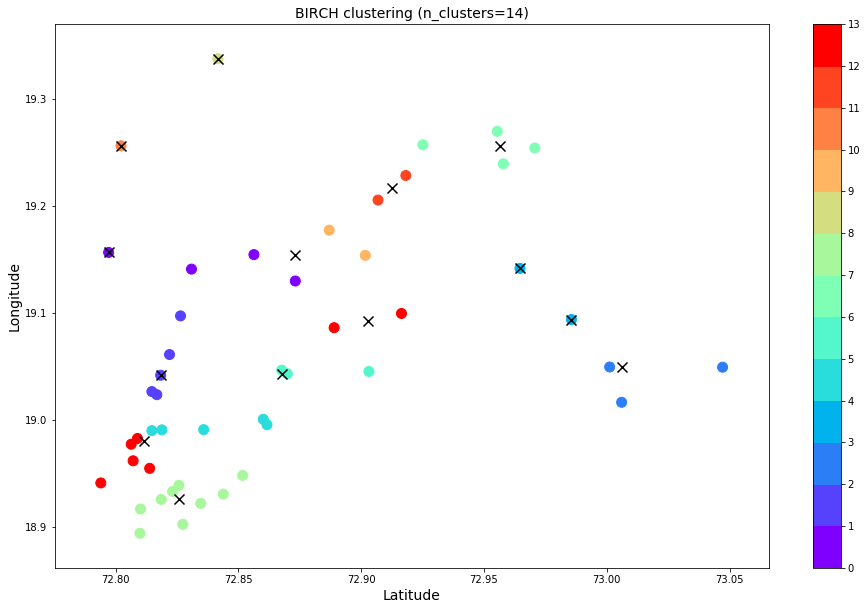

In [59]:
colormap = plt.cm.rainbow
normalize = matplotlib.colors.BoundaryNorm(np.arange(0,14,1), colormap.N)
fig = plt.figure(figsize=(16,10))
plt.scatter(Bir_schedule['Longitude'], Bir_schedule['Latitude'], c = Bir_schedule['Cluster'], cmap = colormap, norm= normalize, s = 100)
plt.colorbar(ticks=np.linspace(0,13,14))
centers = clf.centroids_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1 ,marker = 'x');
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('BIRCH clustering (n_clusters=14)', fontsize=14)
plt.show()